# Esercitazione 2: Heart Disease

**1 - \[\*\]** 
- Importare le librerie **numpy**, **pandas** e **matplotlib.pyplot** con i rispettivi alias: **np**, **pd** e **plt**.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**2 - \[\*\]** 
- Caricare la tabella contenuta in *heart.csv*

In [3]:
df_heart = pd.read_csv('heart.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**3 - \[\*\]** 
- Valutare la quantità di dati mancanti

In [4]:
df_heart.info()
# nessuna colonna del dataset presenta dati mancanti

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**4 - \[\*\*\*\]**
- Le variabili categoriche del dataset non sono segnate come tali dato che hanno un valore numerico. Definire un vettore di feature categoriche, sapendo che le feature numeriche sono le seguenti: <br>

> numerical_features = \['age', 'trestbps', 'chol', 'thalach', 'oldpeak'\]

- Assegnare il tipo *category* alle colonne interessate. <br>

> Suggerimento: usare il metodo **.ASTYPE(new_type)** sul DataFrame. Restituisce un DF con colonne di tipo *new_type*.

In [5]:
# creo la lista delle features numeriche e, per esclusione, ricavo la lista delle features da convertire in categoriche
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = df_heart.columns.drop(numerical_features)

# dichiaro il dizionario delle features categoriche e lo utilizzo come input nella funzione "astype" per la conversione
dict_categorical = {c:'category' for c in categorical_features}
df_heart = df_heart.astype(dict_categorical)
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null category
cp          303 non-null category
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null category
restecg     303 non-null category
thalach     303 non-null int64
exang       303 non-null category
oldpeak     303 non-null float64
slope       303 non-null category
ca          303 non-null category
thal        303 non-null category
target      303 non-null category
dtypes: category(9), float64(1), int64(4)
memory usage: 15.8 KB


**5 - \[\*\]**
- Mostrare una descrizione riassuntiva delle colonne **categoriche**
- Siamo in presenza di dataset bilanciato su la colonna *target*?

In [6]:
df_heart[categorical_features].describe()
# il dataset è discretamente bilanciato sulla colonna target, che presenta circa il 54% dei valori pari a "1" e il
# restante 46% pari a "0"

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


**6 - \[\*\*\]** 
- Plottare una scatter matrix **per le sole feature numeriche**.<br>
- Individuare negli scatterplot le differenze di *target* tramite il colore dei punti.<br>

> Suggerimento: usare *pd.plotting.scatter_matrix(...)* specificando negli argomenti *figsize = (10,10)*

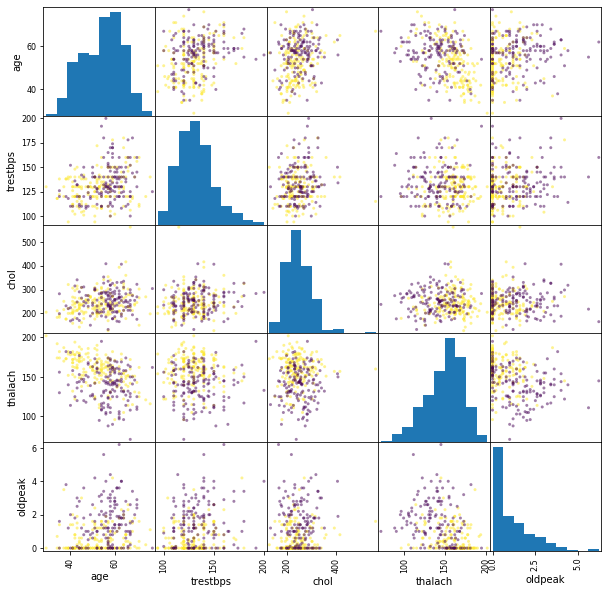

In [7]:
pd.plotting.scatter_matrix(df_heart[numerical_features], c=df_heart['target'], figsize=(10,10))
plt.show()

**7 - \[\*\*\*\]** 
- Per ogni feature categorica, osservare come le categorie separano i valori di target.<br>

>Suggerimento: usare **.groupby(\[...\])**

In [8]:
df_heart[categorical_features].groupby('target').count()
# su questo punto non sono sicurissimo!

,sex,cp,fbs,restecg,exang,slope,ca,thal
target,,,,,,,,
0,138,138,138,138,138,138,138,138
1,165,165,165,165,165,165,165,165


**8 - \[\*\]** 
- Le feature numeriche sono standardizzate?<br>

In [10]:
df_heart[numerical_features].describe()

# Le features numeriche del dataset presentano valori di media e deviazione standard diversi, rispettivamente, da 0 e 1,
# pertanto non sono standardizzate

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


**9 - \[\*\*\]** 
- Importare da *sklearn.preprocessing* la classe *StandardScaler*.<br>
- Inizializzare un modello *StandardScaler*. <br>
- Fittare il modello usando le sole colonne numeriche.<br>
- Trasformare le colonne numeriche con il modello fittato.<br>
- Osservare che le colonne interessate abbiano media 0 e deviazione standard pari a 1.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_heart[numerical_features]), columns=numerical_features)
scaled_df.describe()

# Dopo la standardizzazione, le features numeriche presentano effettivamente valori di media e deviazione standard molto
# prossimi a 0 e 1

,age,trestbps,chol,thalach,oldpeak
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,5.825923e-17,-7.146832e-16,-9.828955e-17,-5.203025e-16,-3.140136e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00


**10 - \[\*\*\]** 
- Importare da *sklearn.manifold* la classe *Isomap*.<br>
- Inizializzare un modello *Isomap* con 3 componenti con un vicinato di 6 punti. <br>
- Fittare il modello usando il datest standardizzato (vedi punto precedente)<br>
- Trasformare il dataset standardizzato tramite il modello *Isomap* fittato.<br>

In [18]:
from sklearn.manifold import Isomap

isomap = Isomap(n_neighbors=6, n_components=3)
isomap_df = isomap.fit_transform(scaled_df)
type(isomap_df)

numpy.ndarray

**11 - \[\*\*\]** 
- Creare un DataFrame *heart_iso* usando il dataset trasformato via Isomap. 
- I nomi delle feature dovranno essere ISO1, ISO2, ISO3.

In [19]:
heart_iso = pd.DataFrame(isomap_df, columns=['ISO1', 'ISO2', 'ISO3'])
heart_iso.head()

,ISO1,ISO2,ISO3
0,2.197852,-0.013691,-1.461621
1,-1.324609,-0.205459,-0.960439
2,-2.262300,-0.282998,-1.620113
3,-1.443064,-0.266858,-0.125135
4,-0.897076,2.548147,1.876019


**12 - \[\*\*\]** 
- Plottare una scatter matrix per il dataset.<br>
- Individuare negli scatterplot le differenze di *target* tramite il colore dei punti.<br>

> Suggerimento: usare *pd.plotting.scatter_matrix(...)* specificando negli argomenti *figsize = (10,10)*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D8EE80CC0>,
      dtype=object)

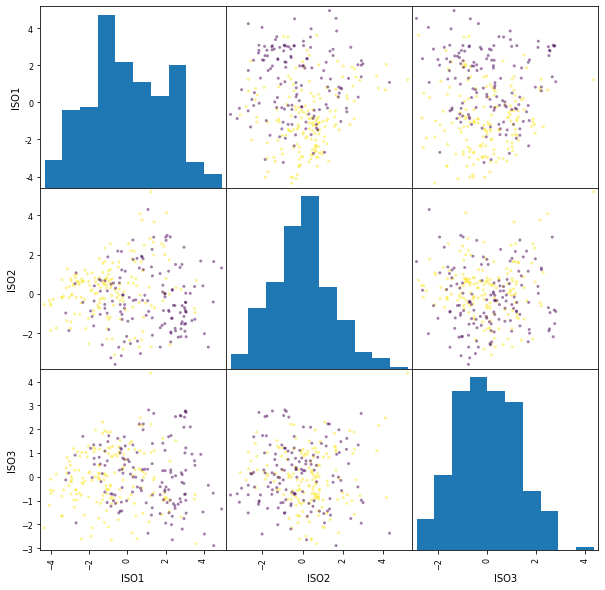

In [21]:
pd.plotting.scatter_matrix(heart_iso, c=df_heart['target'], figsize=(10,10))

**13 - \[\*\*\]** 
- Dal dataset *heart* selezionare circa il 80% dei dati. Salvarli in un dataset *heart_train*

**Bonus! - \[\*\*\*\]** Dal dataset *heart* selezionare **casualmente** circa il 80% dei dati (con un margine massimo del 2%) e salvarlo in un dataset *heart_train*

- Salvare i dati rimanenti in un dataset *heart_test*
- Dal dataset *heart* estrapolare i dati di *target* corrispondenti alle righe selezionate per il dataset *heart_train* e salvarle in una serie *target_train*.
- Salvare i valori rimanenti di *target* in una serie *target_test*

In [39]:
# Utilizzo la funzione "train_test_split" del modulo sklearn.model_selection che permette di dividere facilmente il dataset
# in train-set e test-set rispettando, al contempo, le proporzioni rispetto alla colonna target (di default la funzione
# esegue lo shuffle del dataset)

from sklearn.model_selection import train_test_split

X = df_heart.drop('target', axis=1)
y = df_heart['target']

heart_train, heart_test, target_train, target_test = train_test_split(X, y, test_size=0.2, random_state = 19, stratify=y)

**14 - \[\*\*\]** 
- Dal modulo *sklearn.tree* importare la classe *DecisionTreeClassifier*
- Inizializzare un modello *DecisionTreeClassifier* inserendo tutti gli iperparametri richiesti, se necessario.
- Fittare il modello usando il metodo **.FIT(X_train, Y_train)**
- Valutare le performance del modello fittato usando il metodo **.SCORE(X_train, Y_train)**

L'output del metodo *.score*, è una statistica di nome *mean accuracy*. Ha valori compresi tra 0 e 1, ed è una media delle accuracy sulle varie categorie di *target* rappresenta la capacità del modello di classificare le osservazioni. <br>
In questo caso, rappresenta la percentuale di classificazione corretta del modello.

In [43]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier() # l'albero decisionale può essere istanziato anche senza iperparametri
tree_clf.fit(heart_train, target_train)
print('Decision Tree score on training set: {}'.format(tree_clf.score(heart_train, target_train)))

Decision Tree score on training set: 1.0


**15 - \[\*\]**
- Valutare il modello sul test dataset <br>

> Suggerimento: usare il metodo *.score* del modello addestrato sul test dataset

In [42]:
print('Decision Tree score on test set: {}'.format(tree_clf.score(heart_test, target_test)))

# A fronte di uno score praticamente perfetto sul training set, 

Decision Tree score on test set: 0.7704918032786885


**16 - \[\*\*\]**
- Ci sono delle feature non utili al modello? <br>

> Suggerimento: usare l'attributo *.feature_importances_* del modello addestrato. Più è alto il peso, più importante è l'attributo

In [60]:
feat_imp = {feature:round(tree_clf.feature_importances_[i]*100,2) for i,feature in enumerate(X.columns)}
feat_imp

# Su 13 features, solo 4 presentano un peso superiore ad una soglia arbitraria del 10% ('cp', 'trestbps', 'oldpeak' e 'ca').
# La feature 'exang' presenta un peso pari a zero, non risultando perciò utile alla definizione del modello.

{'age': 5.04,
 'sex': 2.59,
 'cp': 24.07,
 'trestbps': 10.15,
 'chol': 8.52,
 'fbs': 1.25,
 'restecg': 1.12,
 'thalach': 6.44,
 'exang': 0.0,
 'oldpeak': 11.41,
 'slope': 6.46,
 'ca': 16.88,
 'thal': 6.07}